<a name='0_0'></a>
# <span style="color:#ff5f27">👨🏻‍🏫 CNN Fine-tune </span>

🗄️ Table of Contents:

- [📝 Imports](#0)
- [🗄️ Data Loading](#1)
- [👨🏻‍🏭 Data Preprocessing](#2)
- [👩🏻‍🔬 Model Building](#3)
- [👮🏻‍♂️ Model Validation](#4)
- [💾 Model Saving](#5)
- [💽 Model Loading](#6)
- [👨🏻‍🔧 Fine-tuning](#7)
- [🤖 Final Model](#8)
- [👮🏻‍♂️ Model Validation](#9)

<a name='0'></a>
## <span style="color:#ff5f27">📝 Imports </span>

In [1]:
import os
import random
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow import keras 
from keras.models import Sequential 
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout 
from tensorflow.keras import layers 
from keras.utils import to_categorical 
from keras.datasets import cifar10
from tensorflow.random import set_seed
from keras.preprocessing.image import ImageDataGenerator 

from skimage.transform import resize 
from keras.models import load_model 

2023-10-17 00:44:27.762188: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<a name='1'></a>
## <span style="color:#ff5f27">🗄️ Data Loading </span>

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [3]:
print('x_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [4]:
def show_image(image_index, data=X_train, target=y_train):
    classification = [
        'airplane', 'automobile', 'bird', 'cat','deer', 
        'dog', 'frog', 'horse', 'ship', 'truck',
    ]
    plt.figure(figsize=(12,4))
    plt.imshow(data[image_index])
    plt.title(f'Image Class: {classification[target[image_index][0]]}')
    plt.show()

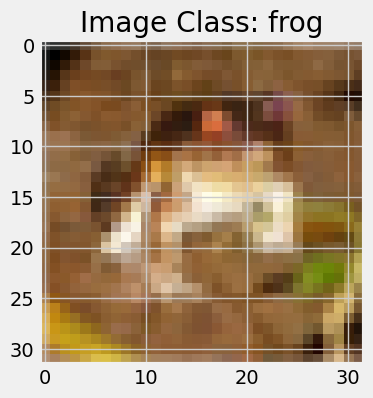

In [5]:
show_image(0)

<a name='2'></a>
## <span style="color:#ff5f27">👨🏻‍🏭 Data Preprocessing </span>
- [🗄️ Table of Contents](#0_0)

In [6]:
y_train_one_hot = to_categorical(y_train) 
y_test_one_hot = to_categorical(y_test)

In [7]:
y_test_one_hot[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [8]:
X_train = X_train / 255 
X_test = X_test / 255 

<a name='3'></a>
## <span style="color:#ff5f27">👩🏻‍🔬 Model Building </span>
- [🗄️ Table of Contents](#0_0)

In [9]:
def reset_seeds(seed_value=42):
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    np.random.seed(seed_value) 
    random.seed(seed_value)
    set_seed(seed_value)

In [10]:
reset_seeds()
model = Sequential() 

model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3))) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, (5, 5), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(1000, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(500, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(250, activation='relu')) 
model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'],
)

2023-10-17 00:44:37.243595: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
history = model.fit(
    X_train, 
    y_train_one_hot, 
    batch_size=256, 
    epochs=10, 
    validation_split=0.2,
)

Epoch 1/10
157/157 [==============================] - 22s 135ms/step - loss: 1.7755 - accuracy: 0.3296 - val_loss: 1.4342 - val_accuracy: 0.4687
Epoch 2/10
157/157 [==============================] - 21s 132ms/step - loss: 1.3663 - accuracy: 0.4969 - val_loss: 1.2092 - val_accuracy: 0.5629
Epoch 3/10
157/157 [==============================] - 20s 126ms/step - loss: 1.2172 - accuracy: 0.5624 - val_loss: 1.1324 - val_accuracy: 0.5948
Epoch 4/10
157/157 [==============================] - 21s 136ms/step - loss: 1.0785 - accuracy: 0.6176 - val_loss: 1.0578 - val_accuracy: 0.6360
Epoch 5/10
157/157 [==============================] - 20s 130ms/step - loss: 1.0016 - accuracy: 0.6452 - val_loss: 0.9911 - val_accuracy: 0.6547
Epoch 6/10
157/157 [==============================] - 21s 131ms/step - loss: 0.9192 - accuracy: 0.6744 - val_loss: 0.9401 - val_accuracy: 0.6804
Epoch 7/10
157/157 [==============================] - 22s 139ms/step - loss: 0.8431 - accuracy: 0.7029 - val_loss: 0.9605 - val_ac

<a name='4'></a>
## <span style="color:#ff5f27">👮🏻‍♂️ Model Validation </span>
- [🗄️ Table of Contents](#0_0)

In [12]:
def plot_loss_and_accuracy(history):
    
    train_accuracy = history.history["accuracy"][-1]
    val_accuracy = history.history["val_accuracy"][-1]
    
    print(f'🎯 Train Accuracy: {train_accuracy}')
    print(f'🎯 Val Accuracy: {val_accuracy}')
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.plot(history.history['loss'], label="train loss")
    ax1.plot(history.history['val_loss'], label="validation loss")
    ax1.set_title("Loss")
    ax1.set_xlabel("Number of Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend()

    ax2.plot(history.history['accuracy'], label="train accuracy")
    ax2.plot(history.history['val_accuracy'], label="validation accuracy")
    ax2.set_title("Accuracy")
    ax2.set_xlabel("Number of Epochs")
    ax2.set_ylabel("Accuracy")
    ax2.legend()

    plt.show()

🎯 Train Accuracy: 0.7687249779701233
🎯 Val Accuracy: 0.6972000002861023


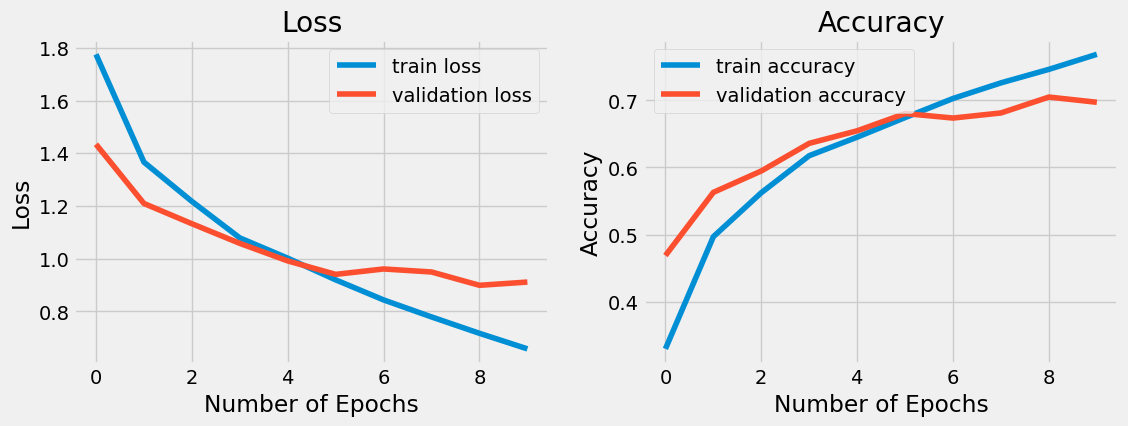

In [13]:
plot_loss_and_accuracy(history)

In [14]:
print(f'⛳️ Test Accuracy: {round(model.evaluate(X_test, y_test_one_hot)[1], 3)}')

313/313 [==============================] - 2s 6ms/step - loss: 0.9225 - accuracy: 0.6871
⛳️ Test Accuracy: 0.687


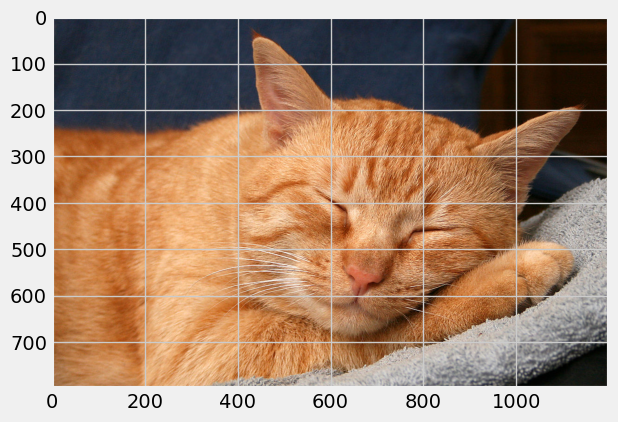

In [15]:
# Load the cat image 
new_image = plt.imread("data/cat.jpg")
img = plt.imshow(new_image)

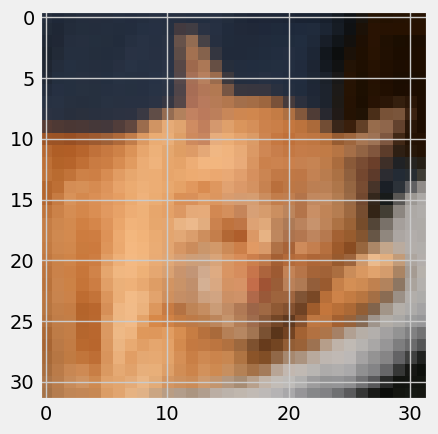

In [16]:
resized_image = resize(new_image, (32,32,3)) 
img = plt.imshow(resized_image)

In [17]:
predictions = model.predict(np.array([resized_image]))
predictions

1/1 [==============================] - 0s 76ms/step


array([[4.6058738e-04, 1.7049350e-04, 1.0547473e-02, 5.1901275e-01,
        9.5893331e-02, 3.2109568e-01, 3.3302803e-02, 1.9031158e-02,
        1.1653266e-04, 3.6934012e-04]], dtype=float32)

In [18]:
def get_top_classes(predictions, n_classes=3):
    classification = [
        'airplane', 'automobile', 'bird', 'cat','deer', 
        'dog', 'frog', 'horse', 'ship', 'truck',
    ]
    # Combine the classification labels and their corresponding probabilities
    class_probabilities = zip(classification, predictions[0])

    # Sort by probabilities in descending order
    sorted_class_probabilities = sorted(class_probabilities, key=lambda x: x[1], reverse=True)

    # Get the top 3 classes
    top_n_classes = {item[0]: item[1] for item in sorted_class_probabilities[:n_classes]}
    
    return top_n_classes

In [19]:
get_top_classes(predictions)

{'cat': 0.51901275, 'dog': 0.32109568, 'deer': 0.09589333}

<a name='5'></a>
## <span style="color:#ff5f27">💾 Model Saving </span>
- [🗄️ Table of Contents](#0_0)

In [20]:
model.save('my_model.h5')

<a name='6'></a>
## <span style="color:#ff5f27">💽 Model Loading </span>
- [🗄️ Table of Contents](#0_0)

In [21]:
model = load_model('my_model.h5')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 1000)              1

<a name='7'></a>
## <span style="color:#ff5f27">👨🏻‍🔧 Fine-tuning</span>
- [🗄️ Table of Contents](#0_0)

In [23]:
layers = ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1']

model_new = Sequential()

for layer_name in layers:
    layer = model.get_layer(layer_name)
    layer.trainable = False
    model_new.add(layer)

model_new.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_new.add(MaxPooling2D(pool_size=(2, 2)))
model_new.add(Dropout(0.3)) 

model_new.add(Flatten()) 
model_new.add(Dense(1024, activation='relu')) 
model_new.add(Dropout(0.3)) 
model_new.add(Dense(512, activation='relu')) 
model_new.add(Dropout(0.4)) 
model_new.add(Dense(128, activation='relu')) 
model_new.add(Dense(10, activation='softmax'))

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)        

In [24]:
model_new.compile(
    optimizer='rmsprop', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'],
)

In [25]:
history_new = model_new.fit(
    X_train, 
    y_train_one_hot, 
    batch_size=256, 
    epochs=10, 
    validation_split=0.2,
)

Epoch 1/10
157/157 [==============================] - 9s 54ms/step - loss: 1.5572 - accuracy: 0.4168 - val_loss: 1.2457 - val_accuracy: 0.5445
Epoch 2/10
157/157 [==============================] - 9s 56ms/step - loss: 1.1788 - accuracy: 0.5769 - val_loss: 1.0734 - val_accuracy: 0.6166
Epoch 3/10
157/157 [==============================] - 9s 57ms/step - loss: 1.0708 - accuracy: 0.6166 - val_loss: 1.0477 - val_accuracy: 0.6268
Epoch 4/10
157/157 [==============================] - 9s 56ms/step - loss: 1.0021 - accuracy: 0.6432 - val_loss: 1.0082 - val_accuracy: 0.6462
Epoch 5/10
157/157 [==============================] - 10s 62ms/step - loss: 0.9619 - accuracy: 0.6620 - val_loss: 0.9876 - val_accuracy: 0.6527
Epoch 6/10
157/157 [==============================] - 8s 54ms/step - loss: 0.9219 - accuracy: 0.6737 - val_loss: 0.9807 - val_accuracy: 0.6479
Epoch 7/10
157/157 [==============================] - 8s 53ms/step - loss: 0.8922 - accuracy: 0.6860 - val_loss: 0.9319 - val_accuracy: 0.669

🎯 Train Accuracy: 0.7133749723434448
🎯 Val Accuracy: 0.6739000082015991


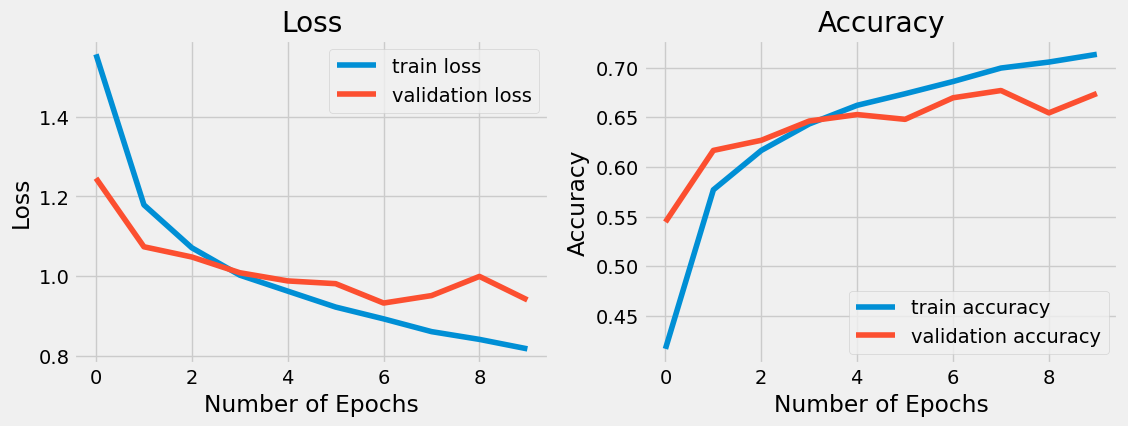

In [26]:
plot_loss_and_accuracy(history_new)

In [27]:
print(f'⛳️ Test Accuracy: {round(model_new.evaluate(X_test, y_test_one_hot)[1], 3)}')

313/313 [==============================] - 2s 5ms/step - loss: 0.9635 - accuracy: 0.6643
⛳️ Test Accuracy: 0.664


In [28]:
predictions = model_new.predict(np.array([resized_image]))
get_top_classes(predictions)

1/1 [==============================] - 0s 71ms/step


{'dog': 0.35654622, 'deer': 0.33965066, 'cat': 0.22156428}

<a name='8'></a>
## <span style="color:#ff5f27">🤖 Final Model </span>
- [🗄️ Table of Contents](#0_0)

In [29]:
X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(
    X_train, 
    y_train_one_hot, 
    test_size=0.1, 
    random_state=42,
)

In [30]:
datagen = ImageDataGenerator(
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
datagen.fit(X_train)

In [31]:
classification = [
        'airplane', 'automobile', 'bird', 'cat','deer', 
        'dog', 'frog', 'horse', 'ship', 'truck',
    ]

INDEX_TO_SHOW = 4

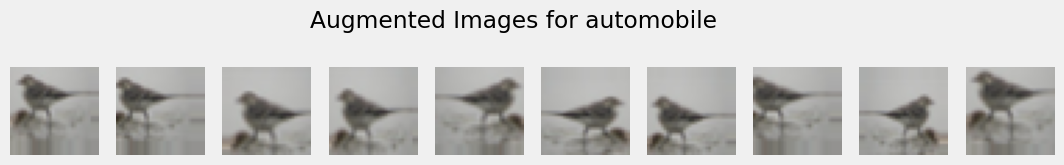

In [32]:
images_aug = datagen.flow(X_train[INDEX_TO_SHOW].reshape(-1, 32, 32, 3))

fig, axes = plt.subplots(1, 10, figsize = (12, 2))
axes = axes.ravel()

for i in range(10):
    image_aug = next(images_aug)[0]
    axes[i].imshow(image_aug, cmap = 'gray')
    axes[i].axis('off')

fig.suptitle(f"Augmented Images for {classification[y_train[INDEX_TO_SHOW][0]]}")
plt.show()

In [33]:
reset_seeds()
model_final = Sequential()
model_final.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
model_final.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
model_final.add(MaxPooling2D(pool_size = (2,2)))
model_final.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model_final.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model_final.add(MaxPooling2D(pool_size = (2,2)))
model_final.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model_final.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model_final.add(MaxPooling2D(pool_size = (2,2)))
model_final.add(Dropout(0.1))

model_final.add(Flatten())
model_final.add(Dense(512, activation = 'relu'))
model_final.add(Dropout(0.1))
model_final.add(Dense(256, activation = 'relu'))
model_final.add(Dropout(0.2))
model_final.add(Dense(10, activation = 'softmax'))

In [34]:
model_final.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'],
)

In [35]:
history_final = model_final.fit(
    datagen.flow(X_train, y_train_one_hot, batch_size=250),
    epochs=15, 
    validation_data=(X_val, y_val_one_hot)
)

Epoch 1/15
180/180 [==============================] - 77s 418ms/step - loss: 1.8508 - accuracy: 0.2985 - val_loss: 1.5923 - val_accuracy: 0.3958
Epoch 2/15
180/180 [==============================] - 71s 394ms/step - loss: 1.4702 - accuracy: 0.4520 - val_loss: 1.2115 - val_accuracy: 0.5426
Epoch 3/15
180/180 [==============================] - 74s 410ms/step - loss: 1.2864 - accuracy: 0.5339 - val_loss: 1.1453 - val_accuracy: 0.5824
Epoch 4/15
180/180 [==============================] - 71s 395ms/step - loss: 1.1615 - accuracy: 0.5843 - val_loss: 0.9956 - val_accuracy: 0.6380
Epoch 5/15
180/180 [==============================] - 74s 413ms/step - loss: 1.0616 - accuracy: 0.6219 - val_loss: 1.0065 - val_accuracy: 0.6424
Epoch 6/15
180/180 [==============================] - 74s 412ms/step - loss: 0.9884 - accuracy: 0.6528 - val_loss: 0.8394 - val_accuracy: 0.6950
Epoch 7/15
180/180 [==============================] - 73s 404ms/step - loss: 0.9182 - accuracy: 0.6744 - val_loss: 0.7728 - val_ac

<a name='9'></a>
## <span style="color:#ff5f27">👮🏻‍♂️ Model Validation </span>
- [🗄️ Table of Contents](#0_0)

🎯 Train Accuracy: 0.7775777578353882
🎯 Val Accuracy: 0.7770000100135803


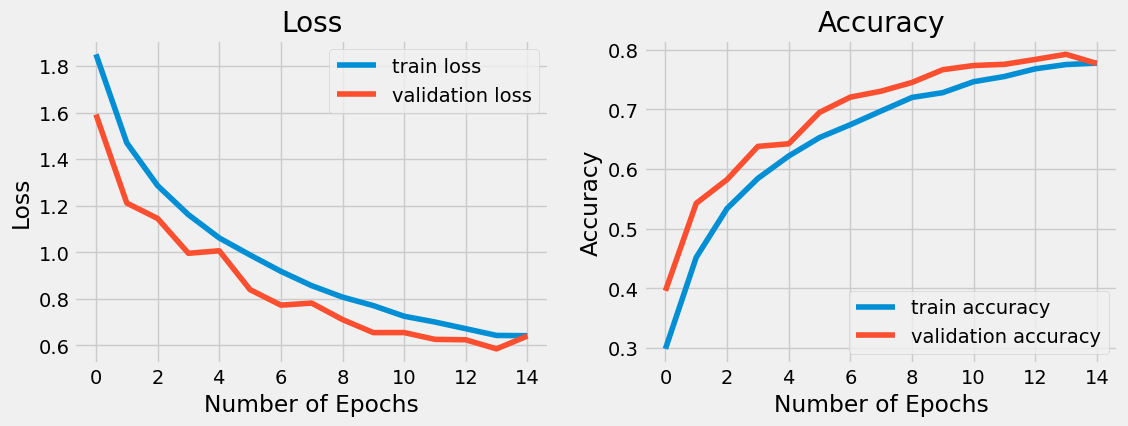

In [36]:
plot_loss_and_accuracy(history_final)

In [37]:
print(f'⛳️ Test Accuracy: {round(model_final.evaluate(X_test, y_test_one_hot)[1], 3)}')

313/313 [==============================] - 4s 14ms/step - loss: 0.6669 - accuracy: 0.7711
⛳️ Test Accuracy: 0.771


1/1 [==============================] - 0s 28ms/step


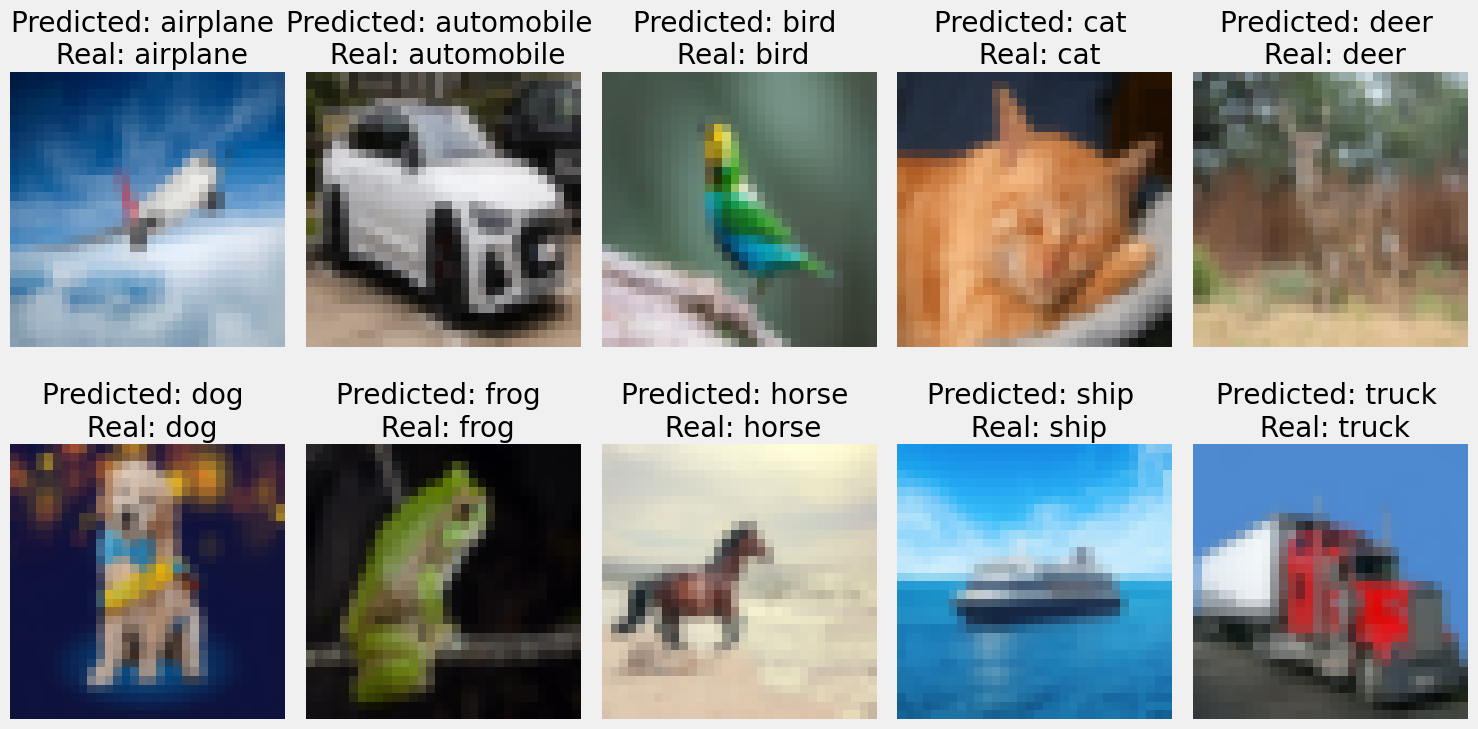

In [38]:
images = {}
predictions = {}

for label in classification:
    image = resize(plt.imread(f"data/{label}.jpg"), (32, 32, 3))
    images[label] = image
    prediction = np.argmax(model_final.predict(np.array([images[label]])))
    predictions[label] = classification[prediction]

fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.ravel()

for i, label in enumerate(classification):
    axes[i].imshow(images[label])
    axes[i].set_title(f"Predicted: {predictions[label]} \n Real: {label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

---